## Exploring and switching between GPUs
In clesperanto, you can list available GPUs and select them for processing.

In [1]:
import numpy as np
import pyclesperanto as cle

In [2]:
cle.list_available_devices()

['NVIDIA GeForce RTX 2080 SUPER',
 'pthread-Intel(R) Core(TM) i7-7820X CPU @ 3.60GHz']

You can then select a GPU and process on it.

In [3]:
cle.select_device('Intel')

(OpenCL) pthread-Intel(R) Core(TM) i7-7820X CPU @ 3.60GHz (OpenCL 1.2 pocl HSTR: pthread-x86_64-pc-linux-gnu-skylake-avx512)
	Type: CPU
	Compute Units: 16
	Global Memory Size: 98765 MB
	Maximum Object Size: 34359 MB

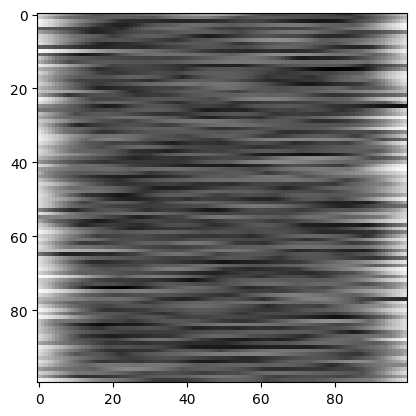

In [4]:
image = np.random.random((10, 100, 100))
processed_image = cle.gaussian_blur(image, sigma_x=10)
cle.imshow(processed_image)

For comparing the performance of multiple devices, run executions of operations multiple times to get a good impression of general performance. Single individual time measurements may be misleading. You can either program your own for-loop or use [timeit](https://docs.python.org/3/library/timeit.html) which can automate that for you./

In [5]:
cle.select_device('Intel')

(OpenCL) pthread-Intel(R) Core(TM) i7-7820X CPU @ 3.60GHz (OpenCL 1.2 pocl HSTR: pthread-x86_64-pc-linux-gnu-skylake-avx512)
	Type: CPU
	Compute Units: 16
	Global Memory Size: 98765 MB
	Maximum Object Size: 34359 MB

In [6]:
%%timeit
cle.gaussian_blur(image, sigma_x=10)

14.3 ms ± 698 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
cle.select_device("TX")

(OpenCL) NVIDIA GeForce RTX 2080 SUPER (OpenCL 3.0 CUDA)
	Type: GPU
	Compute Units: 48
	Global Memory Size: 8358 MB
	Maximum Object Size: 2089 MB

In [8]:
%%timeit
cle.gaussian_blur(image, sigma_x=10)

635 µs ± 4.93 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## cl_info
`cl_info` outputs all information about available hardware

In [9]:
print(cle.cl_info())

['(OpenCL) NVIDIA GeForce RTX 2080 SUPER (OpenCL 3.0 CUDA)\n\tType: GPU\n\tCompute Units: 48\n\tGlobal Memory Size: 8358 MB\n\tMaximum Object Size: 2089 MB\n', '(OpenCL) pthread-Intel(R) Core(TM) i7-7820X CPU @ 3.60GHz (OpenCL 1.2 pocl HSTR: pthread-x86_64-pc-linux-gnu-skylake-avx512)\n\tType: CPU\n\tCompute Units: 16\n\tGlobal Memory Size: 98765 MB\n\tMaximum Object Size: 34359 MB\n']
